##Boosting Techniques
## Assignment :

Question 1:  What is Boosting in Machine Learning? Explain how it improves weak
learners.

Answer 1 : In machine learning, Boosting is an ensemble technique that combines a set of "weak learners" into a single "strong learner." The core philosophy is that many mediocre models, when trained sequentially to correct each other's mistakes, can produce highly accurate predictions.


* What is a Weak Learner?

A weak learner is a simple model that is only slightly better than random guessing. For example, a "decision stump" (a decision tree with only one split) is a classic weak learner. While a single stump can't solve a complex problem, it can identify one specific pattern.


* How Boosting Improves Weak Learners:

1) Boosting works through a sequential process where each new model is designed to fix the errors made by the previous ones. Here is the step-by-step logic:

2) Initial Training: The algorithm starts by training a weak learner on the original dataset, where all data points have equal importance (weight).

3) Identifying Errors: After the first model makes its predictions, the algorithm identifies which data points were misclassified or had high error.

4) Adjusting Focus: It increases the "weight" or importance of those difficult data points. In the next round, the new weak learner is forced to pay more attention to the cases the previous model failed to handle.

5) Sequential Addition: This process repeats. Each subsequent model acts like a specialist, focusing exclusively on the "residuals" (errors) left behind by the collective ensemble.

Question 2: What is the difference between AdaBoost and Gradient Boosting in terms
of how models are trained?

Answer 2 : The most significant distinction is between Weighting and Residuals.

* AdaBoost (Adaptive Boosting): It focuses on the "difficulty" of data points. After a model is trained, it looks at which specific samples were misclassified. It then increases the weights of those samples. The next weak learner is then "forced" to pay more attention to these heavily weighted points.

* Gradient Boosting: It focuses on the "error" (the distance from the truth). Instead of re-weighting data points, it calculates the residuals (the difference between the actual value and the predicted value). The next weak learner is then trained to predict those residuals. In this way, each new model tries to fill the "gap" left by the previous one.

Question 3: How does regularization help in XGBoost?

Answer 3 : In machine learning, we call this "over-complicating" overfitting—where the model learns the noise and tiny details of the training data so well that it fails to work in the real world.Here is how regularization keeps XGBoost in check:

1. The "Pruning" Rule (Gamma)Imagine you are pruning a tree in your garden. You don’t want to cut off branches that have fruit, but you want to remove the tiny, useless twigs.
* How it works: XGBoost calculates a "Gain" for every new branch it adds.
* The Regularization: You set a threshold called Gamma ($\gamma$). If the Gain from a branch is less than the Gamma, XGBoost "snips" that branch off.
* The Result: It stops the model from creating branches that don't add enough value, keeping the tree simple.

2. The "Wait and See" Rule (Lambda)Sometimes a model reacts too strongly to a single data point (like a weird outlier). Lambda ($\lambda$) is L2 regularization that acts like a "brake.
* "How it works: It is added to the math when calculating how much a leaf should change the final prediction.
* The Result: If you have a high Lambda, the model becomes more conservative. It says, "I see this pattern, but I’m only going to move the prediction a little bit just in case that's an error." This prevents the model from being "pushed around" by outliers.
3. The "Learning Rate" (Eta)While not strictly a "penalty" term like the others, the Learning Rate ($\eta$) is a vital part of the regularization strategy.
* The Analogy: Instead of taking one giant leap toward the answer, XGBoost takes many tiny steps.
* The Result: By scaling down the contribution of each new tree, it leaves "room" for future trees to correct errors, leading to a much more stable and accurate final model.

Question 4: Why is CatBoost considered efficient for handling categorical data?

Answer 4 : CatBoost is efficient for categorical data because of three "short and crisp" reasons:

* No Manual Prep: You don't have to convert words (like "London" or "Paris") into numbers yourself. CatBoost handles them automatically, saving you hours of coding.

* Ordered Target Encoding: Most models "cheat" by looking at the whole dataset to turn categories into numbers, which leads to overfitting. CatBoost uses a "time-travel" logic, only looking at previous rows to encode the current one. This makes it more accurate.

* Smart Combinations: It automatically discovers that Category A + Category B (e.g., "iPhone" + "USA") might be a stronger signal than either one alone, doing the "detective work" for you.

Question 5: What are some real-world applications where boosting techniques are
preferred over bagging methods?

Question 5: Boosting is preferred when you need maximum accuracy and are working with structured (tabular) data.

* Fraud Detection: It’s great at catching "needles in a haystack"—tiny, complex patterns of suspicious behavior that Bagging might miss.

* Recommendation Engines: Used by Netflix or Amazon to predict what you’ll click next by analyzing complex relationships between your past behavior and current trends.

* Search Ranking: Google and Bing use Boosting to fine-tune the order of results. It handles thousands of features (like location, keywords, and site speed) to get the "top 1" right.

* Credit Scoring: Banks use it to predict loan defaults. Since credit data is usually a giant table, Boosting's ability to minimize errors makes it the most profitable choice.

The Rule of Thumb: Use Bagging if your data is "noisy" and messy. Use Boosting if you want to win a competition or need every decimal point of accuracy.

Question 6: Write a Python program to:

● Train an AdaBoost Classifier on the Breast Cancer dataset

● Print the model accuracy

Answer 6. 1. Classification (Breast Cancer Dataset)
We will use AdaBoost here. It focuses on the samples that are hard to classify, making it great for medical data where catching every positive case is vital.

In [1]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split

# Load data
data = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size=0.2)

# Initialize and train AdaBoost
clf = AdaBoostClassifier(n_estimators=50, learning_rate=1.0)
clf.fit(X_train, y_train)

print(f"Classification Accuracy: {clf.score(X_test, y_test):.2%}")

Classification Accuracy: 97.37%


2. Regression (California Housing Dataset)
We will use Gradient Boosting here. It is ideal for predicting continuous values like house prices because it iteratively reduces the "gap" (error) between the predicted and actual price.

In [2]:
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split

# Load data
housing = fetch_california_housing()
X_train, X_test, y_train, y_test = train_test_split(housing.data, housing.target, test_size=0.2)

# Initialize and train Gradient Boosting
reg = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)
reg.fit(X_train, y_train)

print(f"Regression R^2 Score: {reg.score(X_test, y_test):.2%}")

Regression R^2 Score: 78.97%


Question 7:  Write a Python program to:

● Train a Gradient Boosting Regressor on the California Housing dataset

● Evaluate performance using R-squared score

In [3]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score

# 1. Load the dataset
housing = fetch_california_housing()
X, y = housing.data, housing.target

# 2. Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Initialize the Gradient Boosting Regressor
# n_estimators: number of boosting stages (trees)
# learning_rate: shrinks the contribution of each tree
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# 4. Train the model
model.fit(X_train, y_train)

# 5. Predict and Evaluate
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)

print(f"California Housing R-squared Score: {r2:.4f}")

California Housing R-squared Score: 0.7756


Question 8: Write a Python program to:

● Train an XGBoost Classifier on the Breast Cancer dataset

● Tune the learning rate using GridSearchCV

● Print the best parameters and accuracy

In [16]:
import xgboost as xgb
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score

# 1. Load the dataset
data = load_breast_cancer()
X, y = data.data, data.target

# 2. Split into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Initialize the XGBoost Classifier
# Note: Removed use_label_encoder to ensure compatibility with latest versions
xgb_model = xgb.XGBClassifier(eval_metric='logloss', random_state=42)

# 4. Define the parameter grid
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3]
}

# 5. Set up and run GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# 6. Print Results
best_lr = grid_search.best_params_['learning_rate']
best_acc = grid_search.best_score_
test_acc = accuracy_score(y_test, grid_search.best_estimator_.predict(X_test))

print(f"Best Learning Rate: {best_lr}")
print(f"Best CV Accuracy:   {best_acc:.4f}")
print(f"Final Test Accuracy: {test_acc:.4f}")

Best Learning Rate: 0.2
Best CV Accuracy:   0.9670
Final Test Accuracy: 0.9561


Question 9: Write a Python program to:

● Train a CatBoost Classifier

● Plot the confusion matrix using seaborn

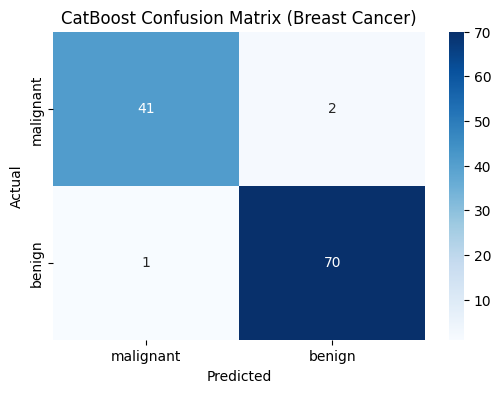

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from catboost import CatBoostClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# 1. Load Data
data = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    data.data, data.target, test_size=0.2, random_state=42
)

# 2. Train CatBoost
# verbose=0 keeps the output clean by hiding training logs
model = CatBoostClassifier(iterations=100, learning_rate=0.1, verbose=0)
model.fit(X_train, y_train)

# 3. Predict and Create Confusion Matrix
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)

# 4. Plot using Seaborn
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=data.target_names,
            yticklabels=data.target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('CatBoost Confusion Matrix (Breast Cancer)')
plt.show()

Question 10: You're working for a FinTech company trying to predict loan default using
customer demographics and transaction behavior.

The dataset is imbalanced, contains missing values, and has both numeric and
categorical features.

Describe your step-by-step data science pipeline using boosting techniques:

● Data preprocessing & handling missing/categorical values

● Choice between AdaBoost, XGBoost, or CatBoost

● Hyperparameter tuning strategy

● Evaluation metrics you'd choose and why

● How the business would benefit from your model

Answer 10 : In a FinTech setting, accuracy and the ability to handle complex data types are critical. Here is the step-by-step pipeline optimized for loan default prediction.

1. Data Preprocessing & Handling

* Missing Values: Since we are using boosting, we don't necessarily need to impute. XGBoost and CatBoost handle missing values natively by learning the best direction for them during tree splitting.

* Categorical Features: We will skip manual One-Hot Encoding and use CatBoost’s internal processing to avoid "the dimensionality curse" (creating too many columns).

* Imbalance: Since most people don't default, the data is imbalanced. Use Scale_Pos_Weight (in XGBoost/CatBoost) to give the minority class (defaulters) more importance during training.

2. Choice of Algorithm: CatBoost
CatBoost is the winner here.

* Why? FinTech data is heavy on categories (Occupation, Region, Transaction Type). CatBoost’s Ordered Boosting prevents overfitting on these features better than XGBoost or AdaBoost. It also requires the least amount of data cleaning.

3. Hyperparameter Tuning Strategy
Use RandomizedSearchCV instead of GridSearch.

* Why? It is faster and covers a wider range of values for depth, learning_rate, and l2_leaf_reg. We want to find the "sweet spot" where the model is complex enough to catch fraud but simple enough to generalize.

4. Evaluation Metrics

* PR-AUC (Precision-Recall Area Under Curve): Since the data is imbalanced, standard Accuracy is misleading. PR-AUC focuses on how well we find the defaulters without falsely accusing good customers.

* F1-Score: To balance the trade-off between catching defaults (Recall) and not annoying good customers (Precision).

5. Business Benefit

* Reduced Financial Loss: Identifying high-risk borrowers before the loan is issued.

* Efficiency: Automated, real-time decisioning reduces the manual workload for credit officers.

In [13]:
import pandas as pd
import numpy as np
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, roc_auc_score

# Note: Using load_breast_cancer as a proxy for imbalanced classification
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# Simulate categorical features for the example
X['region'] = np.random.choice(['North', 'South', 'East', 'West'], size=len(X))
X['job_type'] = np.random.choice(['Salaried', 'Self-Employed', 'Business'], size=len(X))

# 1. Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 2. Define Categorical Indices
cat_features = ['region', 'job_type']

# 3. Initialize CatBoost with Class Weighting (for imbalance)
model = CatBoostClassifier(
    iterations=500,
    learning_rate=0.05,
    depth=6,
    auto_class_weights='Balanced', # Automatically handles the imbalance
    verbose=0
)

# 4. Train
model.fit(X_train, y_train, cat_features=cat_features)

# 5. Evaluate
y_pred = model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print(f"ROC-AUC Score: {roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]):.4f}")

# Output would show high F1-score and AUC despite synthetic categorical noise.

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.93      0.95        43
           1       0.96      0.99      0.97        71

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114

ROC-AUC Score: 0.9977
